In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plot_sim as ps

#%matplotlib notebook
#DEFAULT_FIGSIZE = (8, 6)
%matplotlib inline 
DEFAULT_FIGSIZE = (12, 8)

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

In [2]:
def plot_response(log):
    fig, ax = plt.subplots()
    ax.plot(log.t,
            ps.get_kollmorgen_command_torque(
                log.records.actuators.kollmorgen_command_velocity),
            label='commanded motor torque')
    
    measured_torque = ps.get_kollmorgen_applied_torque(
        log.records.sensors.kollmorgen_actual_torque)
    ax.plot(log.t,
            measured_torque - measured_torque[:100].mean(),
            label='measured motor torque')
    
    encoder_angle = log.records.sensors.steer_encoder_count * 2*np.pi/152000
    encoder_angle[np.where(encoder_angle > np.pi)[0]] -= 2*np.pi
    ax.plot(log.t,
            encoder_angle - encoder_angle[0],
            label='measured steer angle')
    ax.legend()
    ax.set_xlabel('time [s]')
    ax.set_ylabel('[N-m, rad]')
    return fig, ax

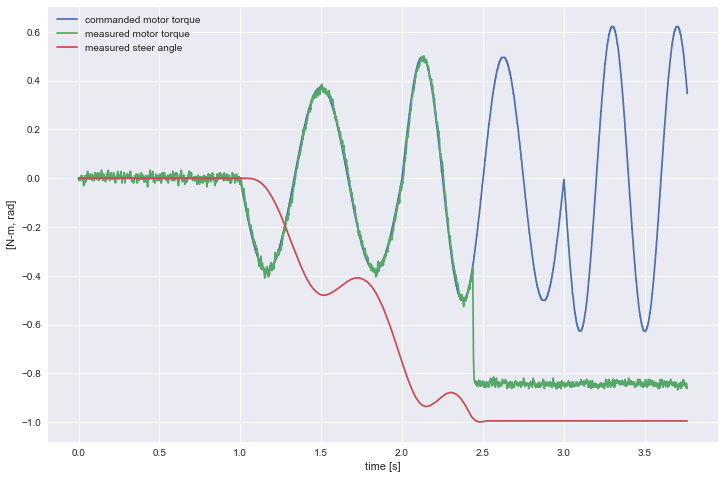

In [8]:
log = ps.ProcessedRecord('../tools/build/sin_resp_1.pb.cobs')
plt.close('all')
plot_response(log)
plt.show()

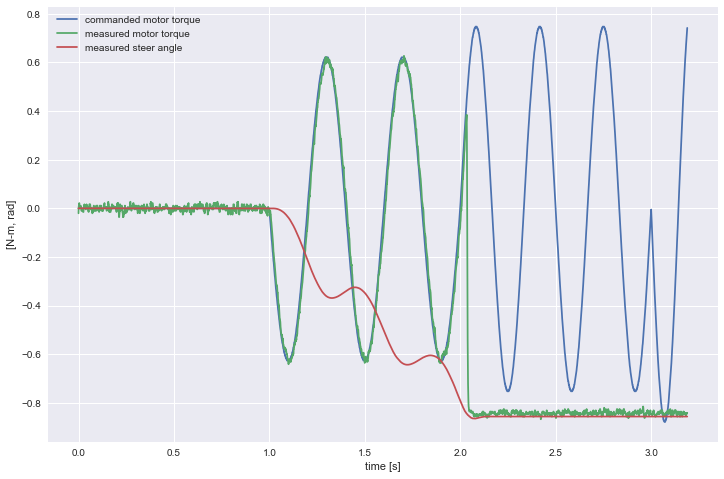

In [9]:
log = ps.ProcessedRecord('../tools/build/sin_resp_2.pb.cobs')
plt.close('all')
plot_response(log)
plt.show()

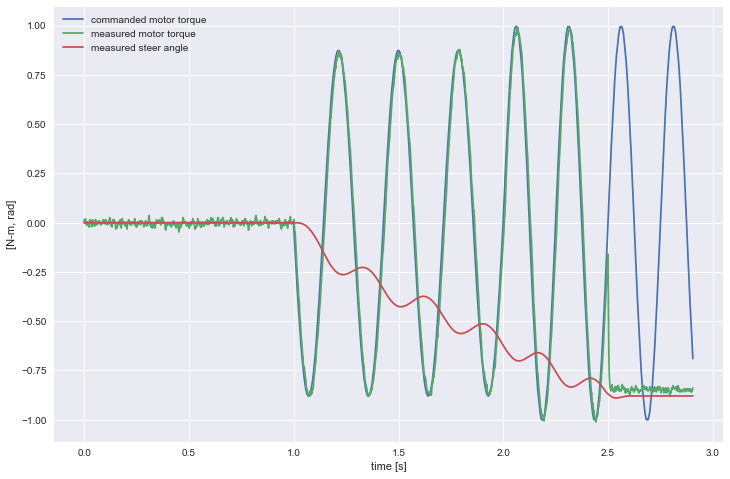

In [11]:
log = ps.ProcessedRecord('../tools/build/sin_resp_3.pb.cobs')
plt.close('all')
plot_response(log)
plt.show()

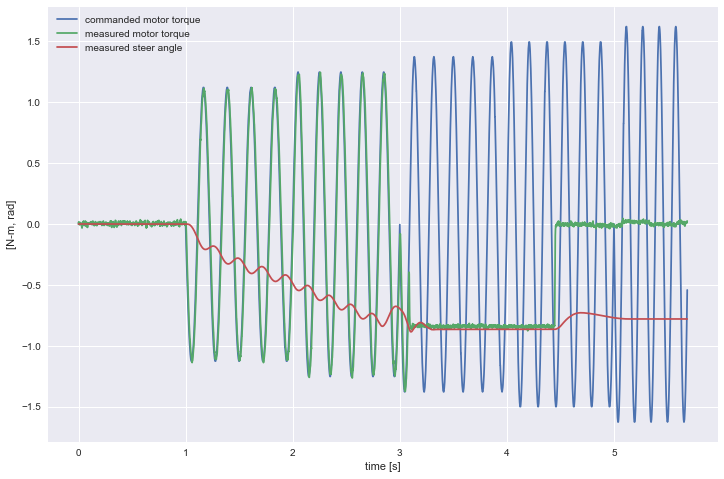

In [12]:
log = ps.ProcessedRecord('../tools/build/sin_resp_4.pb.cobs')
plt.close('all')
plot_response(log)
plt.show()